<a href="https://colab.research.google.com/github/nallagondu/DATASCIENCE-practice/blob/main/Cordivoscular_disease_zscore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

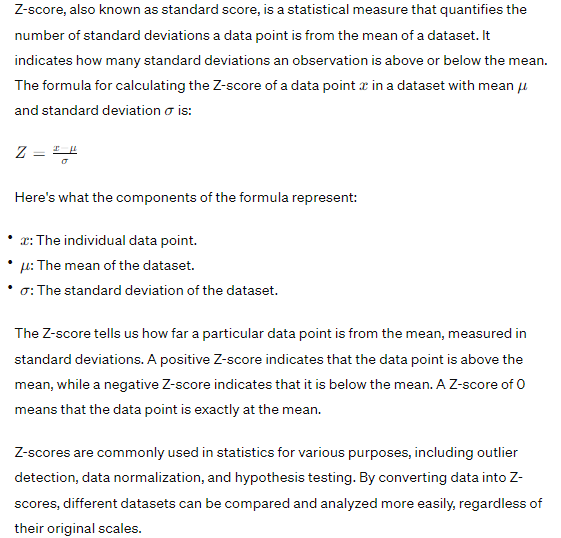
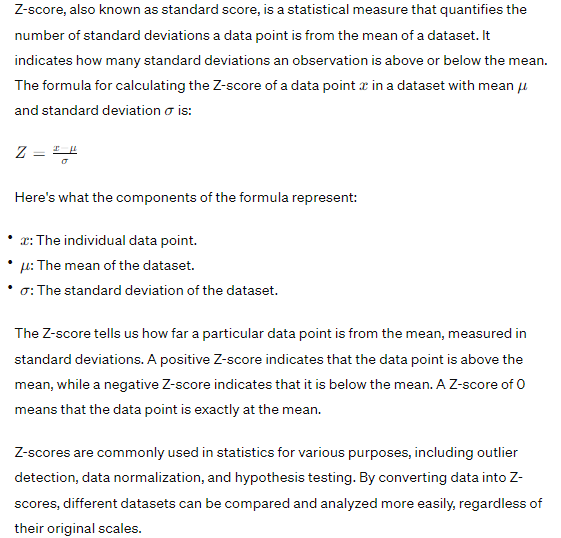

**Bagging Classifier **

A Bagging Classifier is an ensemble learning technique that combines multiple base classifiers (or learners) to make predictions. It stands for Bootstrap Aggregating, where the term "bootstrap" refers to the statistical method of sampling with replacement, and "aggregating" refers to combining the predictions of multiple models.

Here's how a Bagging Classifier works:

Bootstrap Sampling: It creates multiple subsets of the training data by sampling with replacement. Each subset is called a "bootstrap sample."

Base Classifier Training: For each bootstrap sample, a base classifier (often a decision tree) is trained on that subset of the data. Because of the sampling with replacement, each bootstrap sample is slightly different, and therefore each base classifier will be slightly different.

Aggregation: After training all base classifiers, predictions are made by each base classifier on the unseen data (or the original dataset not used in training). The final prediction for each instance is then determined by aggregating the predictions of all base classifiers. For classification tasks, this typically involves voting (i.e., the class with the most votes wins), while for regression tasks, it may involve averaging.

Bagging classifiers offer several benefits:

Reduced Variance: By training multiple models on slightly different datasets, bagging reduces variance and helps prevent overfitting.
Improved Stability: Bagging helps to stabilize the learning process by reducing the impact of outliers and noisy data points.
Improved Accuracy: Aggregating predictions from multiple models often leads to more accurate predictions than any individual base classifier.
Random Forest is a popular example of a bagging classifier, where the base classifiers are decision trees. However, bagging classifiers can use different base classifiers, not limited to decision trees.

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.datasets import load_breast_cancer

# Load the breast cancer dataset
dataset = load_breast_cancer()

# Extract features (X) and target (y) from the dataset
X = dataset.data
y = dataset.target


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X, y ,random_state =234)


In [ ]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train,y_train)
knn.score(X_test, y_test)

In [ ]:
bag_knn = BaggingClassifier(KNeighborsClassifier(n_neighbors=5),
                            n_estimators=9,max_samples =.7,
                            bootstrap=True, random_state=4, oob_score=True)


In [ ]:
bag_knn.fit(X_train, y_train)
bag_knn.score(X_test, y_test)

In [ ]:
pasting_knn = BaggingClassifier(KNeighborsClassifier(n_neighbors=5),
                            n_estimators=9,max_samples =.7,
                            bootstrap=True, random_state=4, )

In [ ]:
pasting_knn.fit(X_train, y_train)
pasting_knn.score(X_test, y_test)

**Random Forests **is a popular ensemble learning method used for both classification and regression tasks. It works by constructing multiple decision trees during training and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

**Here's how Random Forests work:**

**Bootstrap Sampling**: Random Forests builds multiple decision trees by repeatedly sampling the training data with replacement (bootstrap samples).

Feature Randomness: At each node of the decision tree, a random subset of features is selected as candidates for splitting. This helps in reducing the correlation between the trees and makes the algorithm more robust.

Decision Tree Construction: For each bootstrap sample, a decision tree is constructed by recursively splitting the data based on the selected features until certain stopping criteria are met (e.g., maximum depth, minimum samples per leaf).

Voting or Averaging: For classification tasks, the mode (most frequent class) of the predictions of individual trees is taken as the final prediction. For regression tasks, the average prediction of individual trees is taken.

Random Forests offer several advantages:

They are robust to overfitting because they average multiple decision trees.
They handle high-dimensional data well.
They provide estimates of feature importance.
To use Random Forests in Python, you can use the RandomForestClassifier for classification tasks and RandomForestRegressor for regression tasks from scikit-learn library. Here's a basic example:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Preprocessing ,Normalizing
from sklearn.preprocessing import StandardScaler

#Model
from  sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

#metrcs

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline






In [ ]:
#https://github.com/nallagondu/datatrained-training-ml-Files/blob/main/cardio_train.csv


# Corrected URL to the CSV file
url = "https://raw.githubusercontent.com/nallagondu/datatrained-training-ml-Files/main/cardio_train.csv"


# Read the CSV file into a DataFrame train
df_train = pd.read_csv(url, sep = ';')
# Read the CSV file into a DataFrame test
#df_test = pd.read_csv(url1)

# Display the first few rows of the DataFrame
df_train.head()

In [ ]:
#dataset state
df_train.shape

In [ ]:
df_train.drop('id',axis=1,inplace=True)


In [ ]:
df_train.describe()

**For my Observation**
1.No Missing Values
2. Assuming age is in number of days
3. Outliers in height Ap_low,Systolic,Cholestrol ..etc


In [ ]:
#Duplicates removal
df_train.drop_duplicates(inplace=True)

In [ ]:
df_train.shape

In [ ]:
plt.figure(figsize = (20,15))
plotnumber = 1

for  column in df_train[['age','height','ap_hi','weight','ap_lo']]:
  if plotnumber <= 6:
    ax = plt.subplot(3,2,plotnumber)
    sns.distplot(df_train[column])
    plt.xlabel(column,fontsize=20)
  plotnumber+=1
plt.tight_layout()

**Z_score**

In [ ]:
#With Standerd deviation 3 ,lets see the stats

from scipy.stats import zscore

z_score = zscore(df_train[['age','height','ap_hi','weight','ap_lo']])
abs_zscore = np.abs(z_score) # apply the formula and get the scaled data
filtering_entry = (abs_zscore <3).all(axis=1)

df_train = df_train[filtering_entry]
df_train.describe()


In [ ]:
df_train.head()

In [ ]:
plt.figure(figsize = (20,15))
plotnumber = 1

for  column in df_train[['age','height','ap_hi','weight','ap_lo']]:
  if plotnumber <= 6:
    ax = plt.subplot(3,2,plotnumber)
    sns.distplot(df_train[column])
    plt.xlabel(column,fontsize=20)
  plotnumber+=1
plt.tight_layout()


In [ ]:
df_train.shape

In [ ]:
# corelation and ,feature selections ,KNN,Kbest,

X = df_train.drop(columns=['cardio'], axis =1)
y= df_train['cardio']

In [ ]:
#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = .30, random_state=231)


In [ ]:
def metric_score(clf, X_train,X_test,y_train,y_test, train= True):
  if train:
      y_pred = clf.predict(X_train)
      print("\n ----Train Result ")
      print(f"Accuracy Score: {accuracy_score(y_train,y_pred) * 100: .2f}%")
  elif train==False:
        pred = clf.predict(X_test)
        print("\n ----Test Result ")
        print(f"Accuracy Score: {accuracy_score(y_test,pred) * 100: .2f}%")
        print("\n \n Test Classification Report \n",classification_report(y_test,pred,digits=2))

In [ ]:
random_clf = RandomForestClassifier()
# Train the model
random_clf.fit(X_train,y_train)

In [ ]:
metric_score(random_clf,X_train,X_test,y_train,y_test, train=True)
metric_score(random_clf,X_train,X_test,y_train,y_test, train=False)

----Test Result
Accuracy Score:  71.15%
 **is not a good result , so need to go for runing the parameters using GridsearchCv**

In [ ]:
#RandomForest Classifier
params = {'n_estimators':[13,25], # in realtime we can give range()
           'criterion':['entropy','gini'],
            'max_depth':[10,25],
            'min_samples_split':[10,21],
            'min_samples_leaf':[5,16]
          }
grd = GridSearchCV(random_clf,param_grid=params)
grd.fit(X_train,y_train)

print('best_params => ', grd.best_params_)


In [ ]:
random_clf = grd.best_estimator_
random_clf.fit(X_train,y_train)

In [ ]:
metric_score(random_clf,X_train,X_test,y_train,y_test, train=True)
metric_score(random_clf,X_train,X_test,y_train,y_test, train=False)